In [2]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [3]:
import soundfile as sf

data, samplerate = sf.read('New Order - Blue Monday - Multitrack\\01 Blue Monday Drums 01.wav', dtype='int16')
#sf.write('new_file.flac', data, samplerate)

In [4]:
drums = data.T[1][30000:500000]

<IPython.core.display.Javascript object>


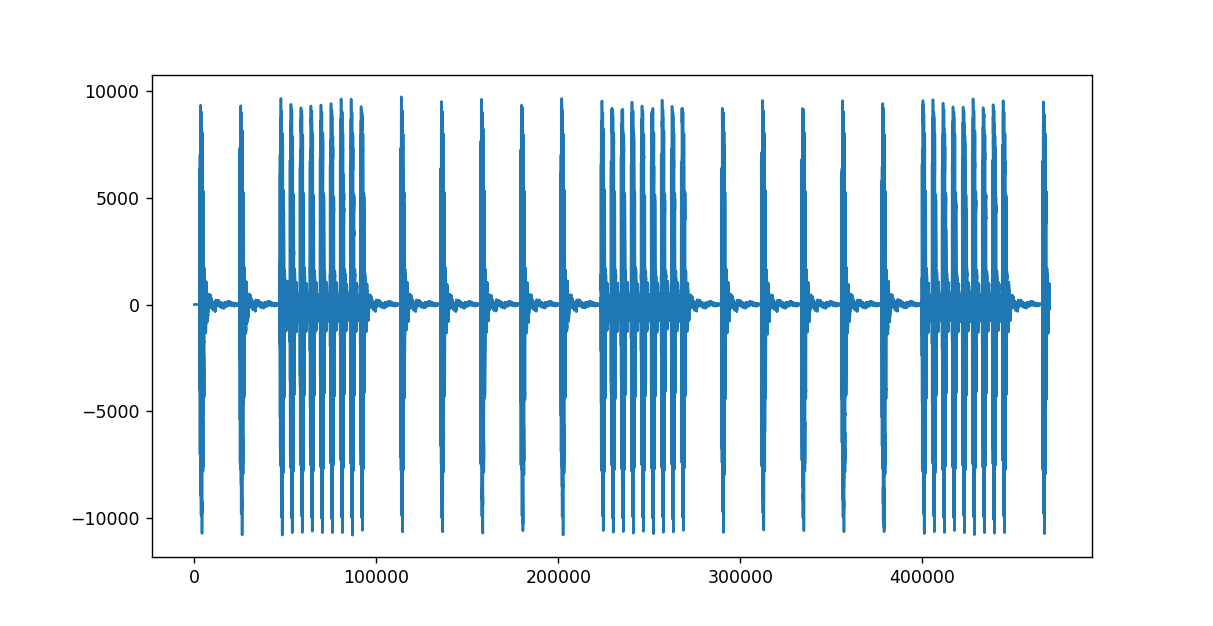

In [5]:
plot(drums)

In [8]:
from scipy.io import wavfile

wavfile.write('440.wav', samplerate, drums)

import IPython
IPython.display.Audio('440.wav')

In [5]:
channel1, _ = sf.read('New Order - Blue Monday - Multitrack\\01 Blue Monday Drums 01.wav', dtype='int16')
channel2, _ = sf.read('New Order - Blue Monday - Multitrack\\02 Blue Monday Drums 02.wav', dtype='int16')
channel3, _ = sf.read('New Order - Blue Monday - Multitrack\\03 Blue Monday Drums 03.wav', dtype='int16')
channel4, _ = sf.read('New Order - Blue Monday - Multitrack\\04 Blue Monday Synth Bass.wav', dtype='int16')
channel5, _ = sf.read('New Order - Blue Monday - Multitrack\\05 Blue Monday Real Bass.wav', dtype='int16')
channel6, _ = sf.read('New Order - Blue Monday - Multitrack\\06 Blue Monday Vocals.wav', dtype='int16')
channel7, _ = sf.read('New Order - Blue Monday - Multitrack\\07 Blue Monday Synths 01.wav', dtype='int16')
channel8, _ = sf.read('New Order - Blue Monday - Multitrack\\08 Blue Monday Synths 02.wav', dtype='int16')

In [6]:
new_channel7 = np.zeros(channel1.shape, dtype='int16')
new_channel7[:channel7.shape[0], :channel7.shape[1]] = channel7
new_channel7.shape

(21600000, 2)

In [9]:
mix = channel1 + channel2 + channel3 + channel4 + channel5 + channel6 + new_channel7 + channel8
wavfile.write('mix.wav', 48000, mix);

<IPython.core.display.Javascript object>


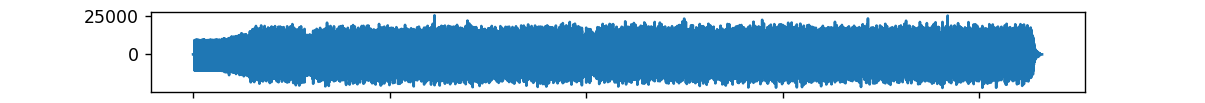

In [86]:
plot(mix.T[0])

In [10]:
import scipy.signal
import matplotlib.pyplot as plt

widths = numpy.arange(1, 31)
drums = channel1 + channel2 + channel3
cwtmatr = scipy.signal.cwt(drums, scipy.signal.ricker, widths)
plt.imshow(cwtmatr, extent=[0, 16, 16, 1024], cmap='Greys', aspect='auto')
plt.show()

ValueError: in1 and in2 should have the same dimensionality

<IPython.core.display.Javascript object>


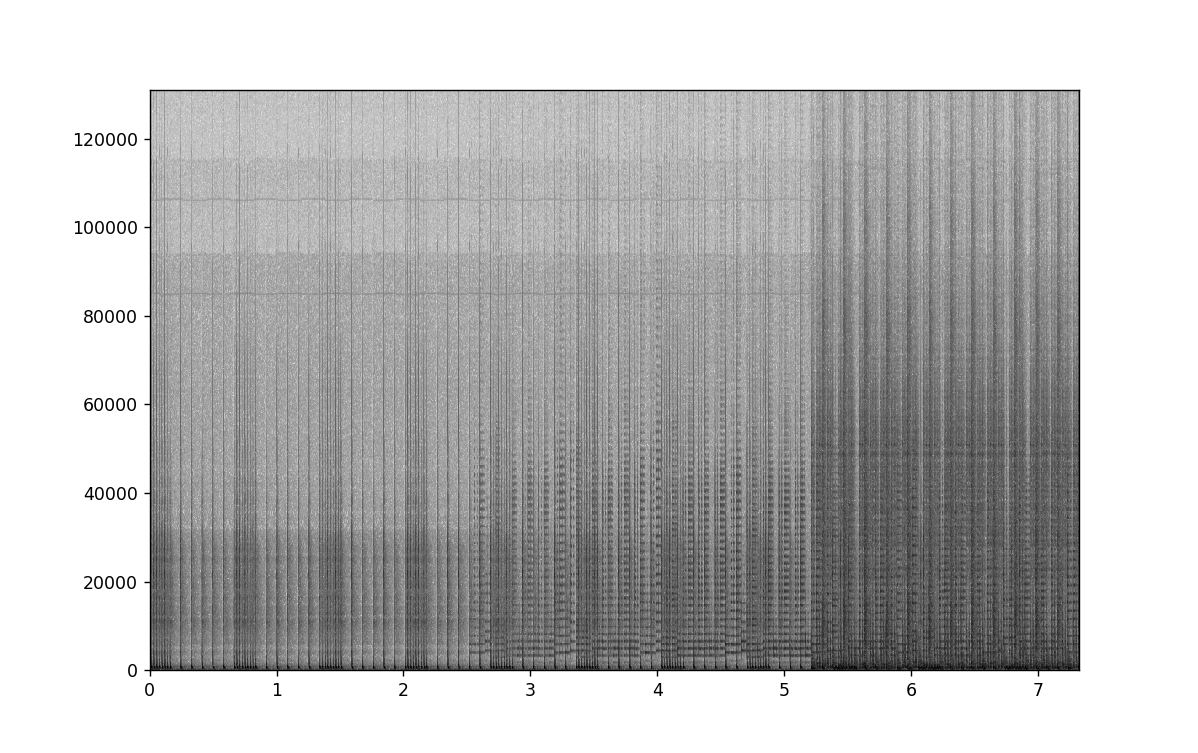

In [88]:
import numpy
import pylab
import wave
import array

pylab.close('all')
w1 = wave.open('440.wav')
x1 = numpy.array(array.array('h', w1.readframes(w1.getnframes())))
Fs = 2 ** 18
NFFT = int(Fs * 0.005)  # 5ms window
noverlap = int(Fs * 0.0025)

pylab.figure(1)
pylab.specgram(mix.T[0][80000:2000000], NFFT=NFFT, Fs=Fs, noverlap=noverlap, cmap=pylab.get_cmap('Greys'));

In [11]:
def pad_samples(samples, left, right):
    return numpy.pad(samples, (left, right), 'constant', constant_values=(samples[0], samples[-1]))

def get_linear_prediction_residues(samples):
    x = pad_samples(samples, 2, 0)
    y = pad_samples(samples, 1, 1)
    z = pad_samples(samples, 0, 2)

    residues = x + z - 2 * y
    return residues[:-2]

In [231]:
get_linear_prediction_residues(channel1.T[0])

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [174]:
import project

x = project.Encoder().compress(linear_predictions, k=3)
len(x)

13441834

In [184]:
2 * 21600000 / 13441834

3.2138471580589374

In [ ]:
import project

samples = mix.T[0]
linear_predictions = get_linear_prediction_residues(samples)
x = project.Encoder().compress(linear_predictions, k=3)
2 * 21600000 / len(x)

In [226]:
import golomb
import itertools

list(golomb.golomb_encode(3, 2))

list(itertools.chain(*map(lambda x: golomb.golomb_encode(3, x), drums)))

ValueError: Integers to negative integer powers are not allowed.

<IPython.core.display.Javascript object>


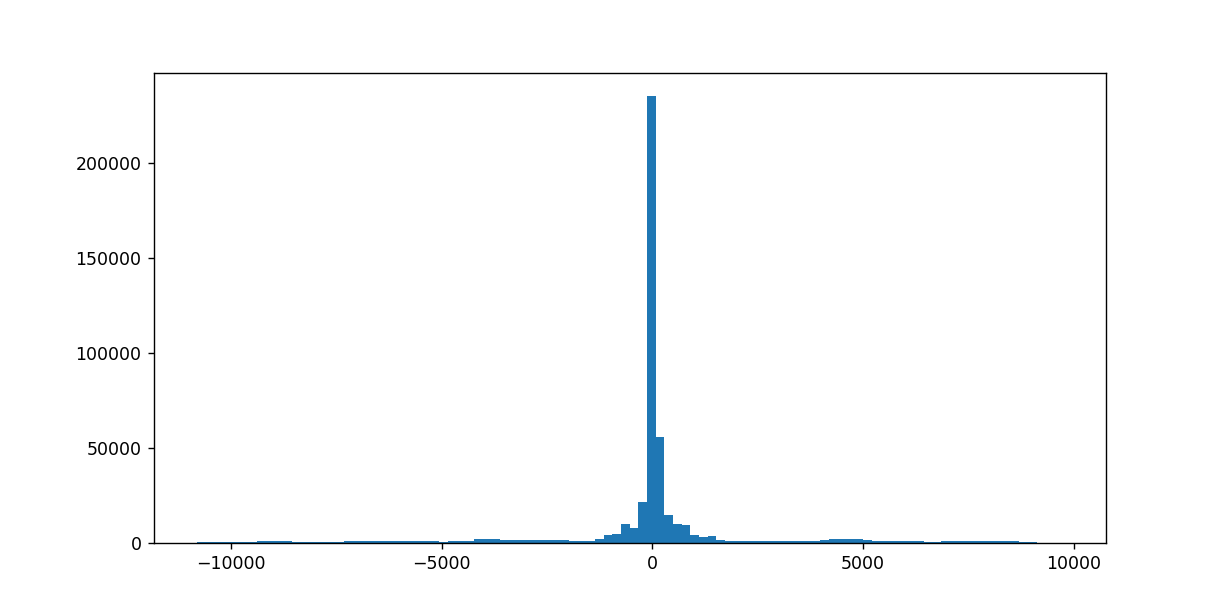

In [236]:
matplotlib.pyplot.hist(drums, bins=100);

<IPython.core.display.Javascript object>


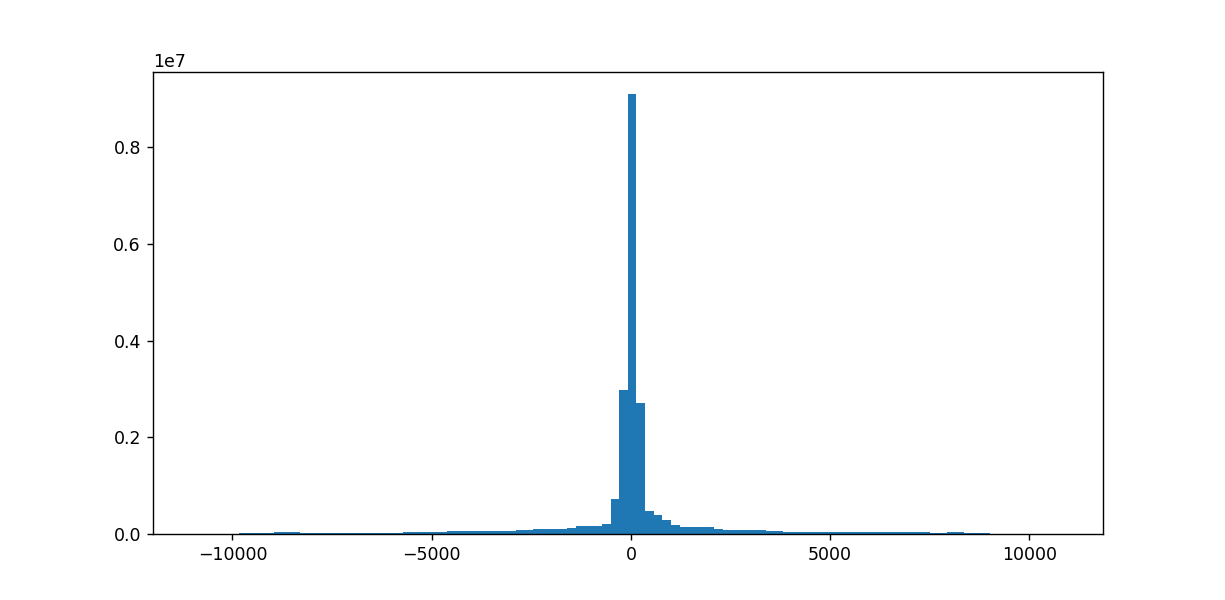

In [238]:
matplotlib.pyplot.hist(channel1.T[0], bins=100);

<IPython.core.display.Javascript object>


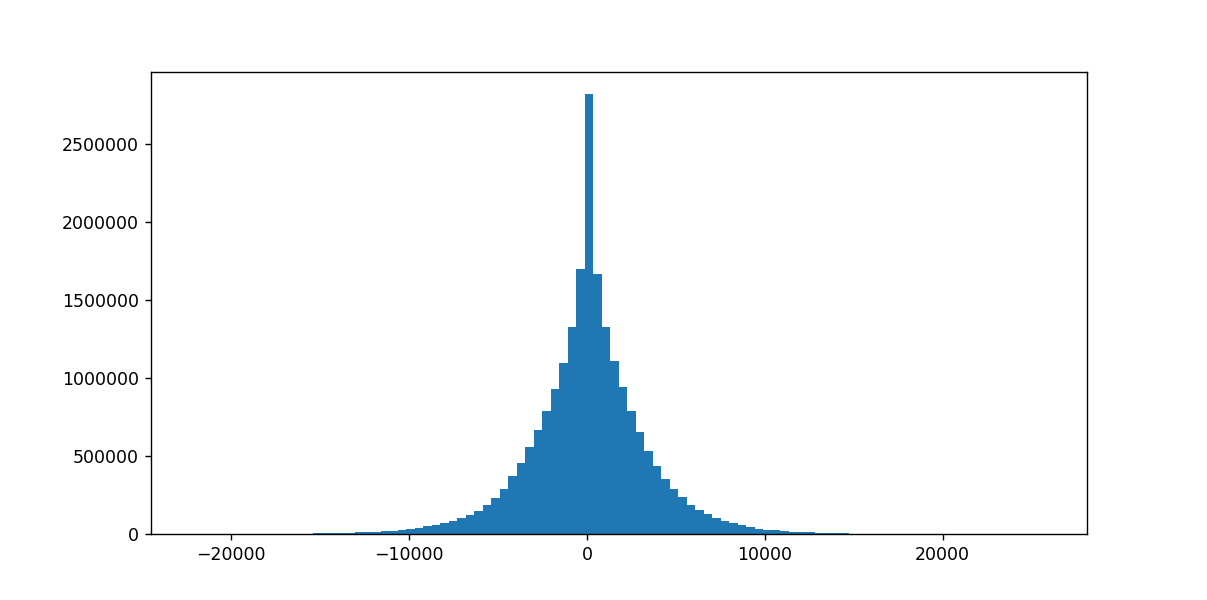

In [237]:
matplotlib.pyplot.hist(mix.T[0], bins=100);

<IPython.core.display.Javascript object>


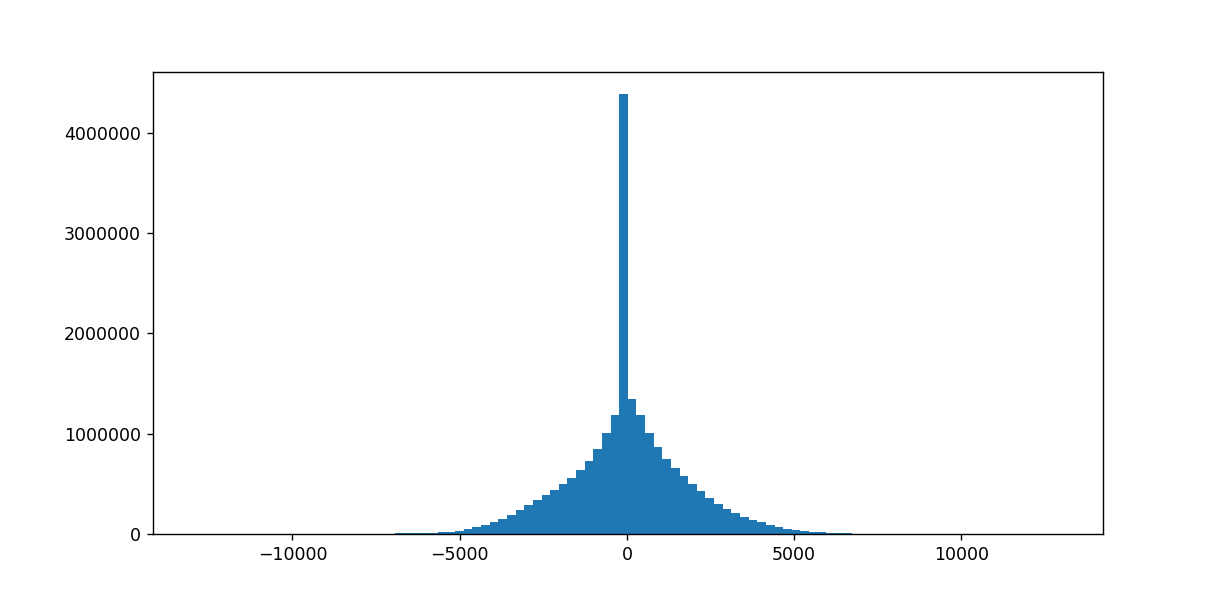

In [239]:
matplotlib.pyplot.hist(channel4.T[0], bins=100);

In [12]:
# TODO: time domain inputs and frequency domain inputs 
class TimeFrame:
    def __init__(self, offset, size, left_channel_samples, right_channel_samples):
        self.time_input = offset
        self.left_input = left_channel_samples[offset: offset + size]
        self.left_output = left_channel_samples[offset + size]
        self.right_input = right_channel_samples[offset: offset + size]
        self.right_output = right_channel_samples[offset + size]
        self.left_input_frequency_domain = [x.real for x in numpy.fft.rfft(self.left_input)][1:]
        self.right_input_frequency_domain = [x.real for x in numpy.fft.rfft(self.right_input)][1:]
    
    #@property
    #def left_input_frequency_domain(self):
    #    if len(numpy.fft.rfft(self.left_input)) > 2048: print('>>>')
    #    return [x.real for x in numpy.fft.rfft(self.left_input)]

    #@property
    #def right_input_frequency_domain(self):
    #    if len(numpy.fft.rfft(self.right_input)) > 2048: print('>>>')
    #    return [x.real for x in numpy.fft.rfft(self.right_input)]

def build_dataset(channel, size):
    left_channel_samples = pad_samples(channel.T[0], size, 0)
    right_channel_samples = pad_samples(channel.T[1], size, 0)
    return [TimeFrame(offset, size, left_channel_samples, right_channel_samples) for offset in range(channel.shape[0])]

<IPython.core.display.Javascript object>


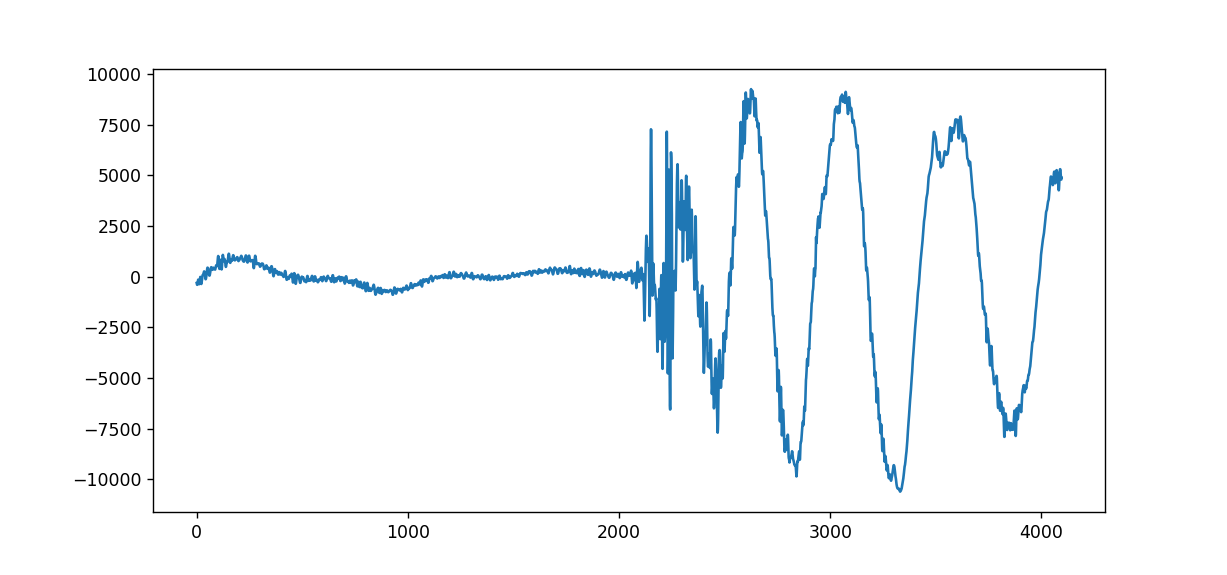

5068


In [364]:
time_frame = list(build_dataset(channel1[:100000], 4096))[90000]
plot(time_frame.left_input)
print(time_frame.left_output)

<IPython.core.display.Javascript object>


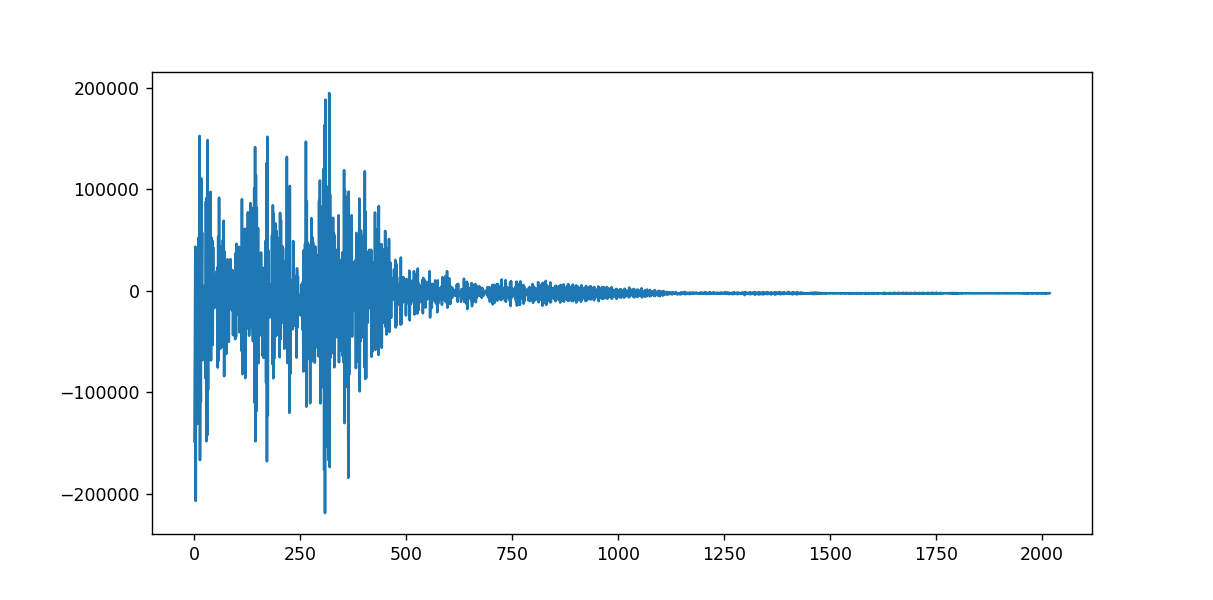

In [304]:
time_frame = list(build_dataset(channel1[:100000], 4096))[90000]
plot([x.real for x in numpy.fft.rfft(time_frame.left_input)][30:])

<IPython.core.display.Javascript object>


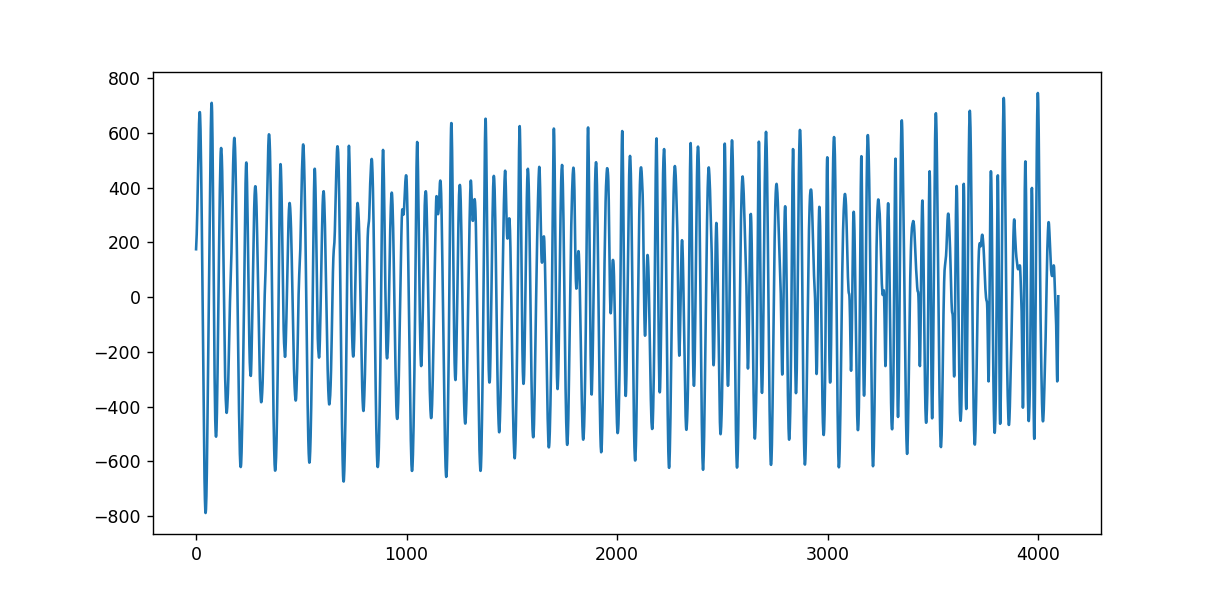

In [344]:
time_frame = list(build_dataset(new_channel7[900000:1000000], 4096))[8000]
plot(time_frame.right_input);

<IPython.core.display.Javascript object>


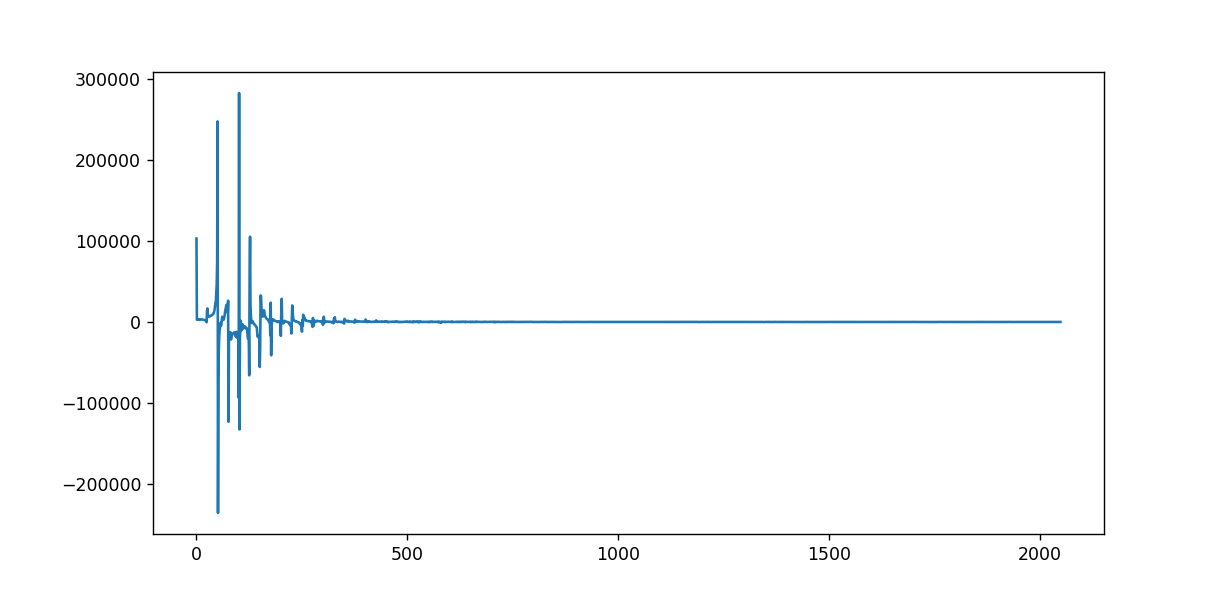

In [358]:
time_frames = list(build_dataset(new_channel7[900000:1000000], 4096))
time_frame = time_frames[8000]
plot(time_frame.left_input_frequency_domain);

In [14]:
import soundfile as sf
channel1_float, _ = sf.read('New Order - Blue Monday - Multitrack\\01 Blue Monday Drums 01.wav')

In [94]:
import tensorflow as tf

batch_size = 100000
input_size = 1
output_size = 2
layer1_size = 200
layer2_size = 200

learning_rate = 7e-5

def train(input, output):
    x = tf.placeholder(tf.float32, shape=(batch_size, input_size))
    w1 = tf.Variable(tf.random_normal((input_size, layer1_size)))
    w2 = tf.Variable(tf.random_normal((layer1_size, layer2_size)))
    w3 = tf.Variable(tf.random_normal((layer2_size, output_size)))
    y = tf.placeholder(tf.float32, shape=(batch_size, output_size))

    h1 = tf.maximum(tf.matmul(x, w1), 0)
    h2 = tf.maximum(tf.matmul(h1, w2), 0)
    y_pred = tf.matmul(h2, w3)
    loss = tf.losses.absolute_difference(y_pred, y) # mean_squared_error
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    updates = optimizer.minimize(loss)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        values = { x: input, y: output }

        for i in range(100):
            loss_val, _, predictions = sess.run([loss, updates, y_pred], feed_dict=values)
            print("Iteration: ", i, "Loss:", loss_val)

        return predictions

#channel1_float, _ = sf.read('New Order - Blue Monday - Multitrack\\01 Blue Monday Drums 01.wav')
#predictions = train(numpy.array(range(100000)).reshape(100000, 1) / 100000, channel1_float[:100000])

<IPython.core.display.Javascript object>


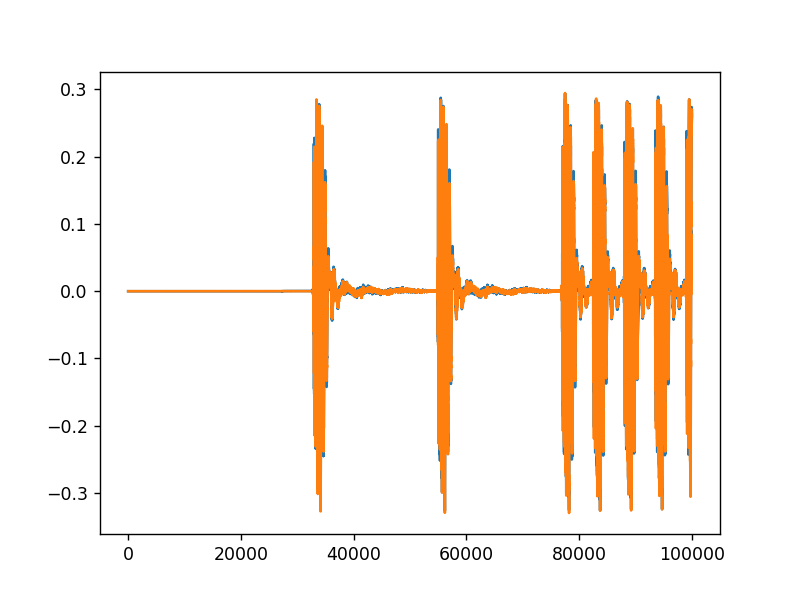

In [57]:
plot(channel1_float[:100000])

In [104]:
import tensorflow as tf

batch_size = 100000
input_size = 2048
output_size = 2
layer1_size = 50
layer2_size = 50
layer3_size = 50
layer4_size = 50
layer5_size = 2

num_steps = 101
learning_rate = 1e-4

graph = tf.Graph()

with graph.as_default():
  input = tf.placeholder(tf.float32, shape=(batch_size, input_size))
  output = tf.placeholder(tf.float32, shape=(batch_size, output_size))

  # Input data.
  #tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, input_size))
  #tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, output_size))
  # tf_valid_dataset = tf.constant(valid_dataset)
  # tf_test_dataset = tf.constant(test_dataset)

  #layer1_weights = tf.Variable(tf.truncated_normal((input_size, layer1_size), stddev=0.1))
  #layer1_biases = tf.Variable(tf.constant(1.0, shape=(layer1_size,)))
  #layer2_weights = tf.Variable(tf.truncated_normal((layer1_size, layer2_size), stddev=0.1))
  #layer2_biases = tf.Variable(tf.constant(1.0, shape=(layer2_size,)))
  #layer3_weights = tf.Variable(tf.truncated_normal((layer2_size, output_size), stddev=0.1))
  #layer3_biases = tf.Variable(tf.constant(1.0, shape=(output_size,)))

  layer1_weights = tf.Variable(tf.random_normal((input_size, layer1_size), stddev=0.1))
  layer1_biases = tf.Variable(tf.constant(0.0, shape=(layer1_size,)))
  layer2_weights = tf.Variable(tf.random_normal((layer1_size, layer2_size), stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(0.0, shape=(layer2_size,)))
  layer3_weights = tf.Variable(tf.random_normal((layer2_size, layer3_size), stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(0.0, shape=(layer3_size,)))
  layer4_weights = tf.Variable(tf.random_normal((layer3_size, layer4_size), stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(0.0, shape=(layer4_size,)))
  layer5_weights = tf.Variable(tf.random_normal((layer4_size, output_size), stddev=0.1))
  layer5_biases = tf.Variable(tf.constant(0.0, shape=(output_size,)))

  # Model.
  def model(data):
    layer = tf.matmul(data, layer1_weights) + layer1_biases
    hidden = tf.nn.relu(layer)

    layer = tf.matmul(hidden, layer2_weights) + layer2_biases
    hidden = tf.nn.relu(layer)
    
    layer = tf.matmul(hidden, layer3_weights) + layer3_biases
    hidden = tf.nn.tanh(layer)
    
    layer = tf.matmul(hidden, layer4_weights) + layer4_biases
    hidden = tf.nn.tanh(layer)

    return tf.matmul(hidden, layer5_weights) + layer5_biases

  # Training computation.
  logits = model(input)
  #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=output, logits=logits))
  loss = tf.losses.mean_squared_error(output, logits)
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  prediction = tf.nn.softmax(logits)

dataset = build_dataset(channel1_float[:100000], 4096)

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    feed_dict = {
        input: [x.left_input_frequency_domain for x in dataset],
        output: [[x.left_output, x.right_output] for x in dataset]
    }
    _, l, predictions = session.run([optimizer, loss, prediction], feed_dict=feed_dict)
    if (step % 10 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))

      #print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
  #print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 0.073339
Minibatch loss at step 10: 0.072917
Minibatch loss at step 20: 0.072499
Minibatch loss at step 30: 0.072086
Minibatch loss at step 40: 0.071677
Minibatch loss at step 50: 0.071273
Minibatch loss at step 60: 0.070873
Minibatch loss at step 70: 0.070477
Minibatch loss at step 80: 0.070086
Minibatch loss at step 90: 0.069699
Minibatch loss at step 100: 0.069316


<IPython.core.display.Javascript object>


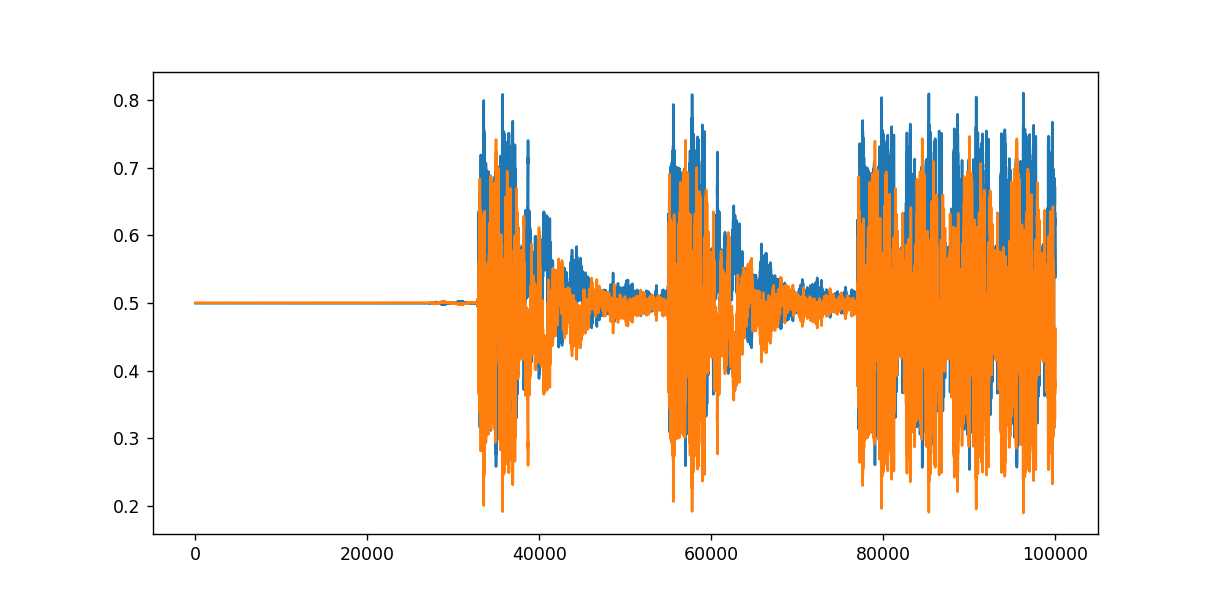

In [111]:
plot(predictions);

<IPython.core.display.Javascript object>


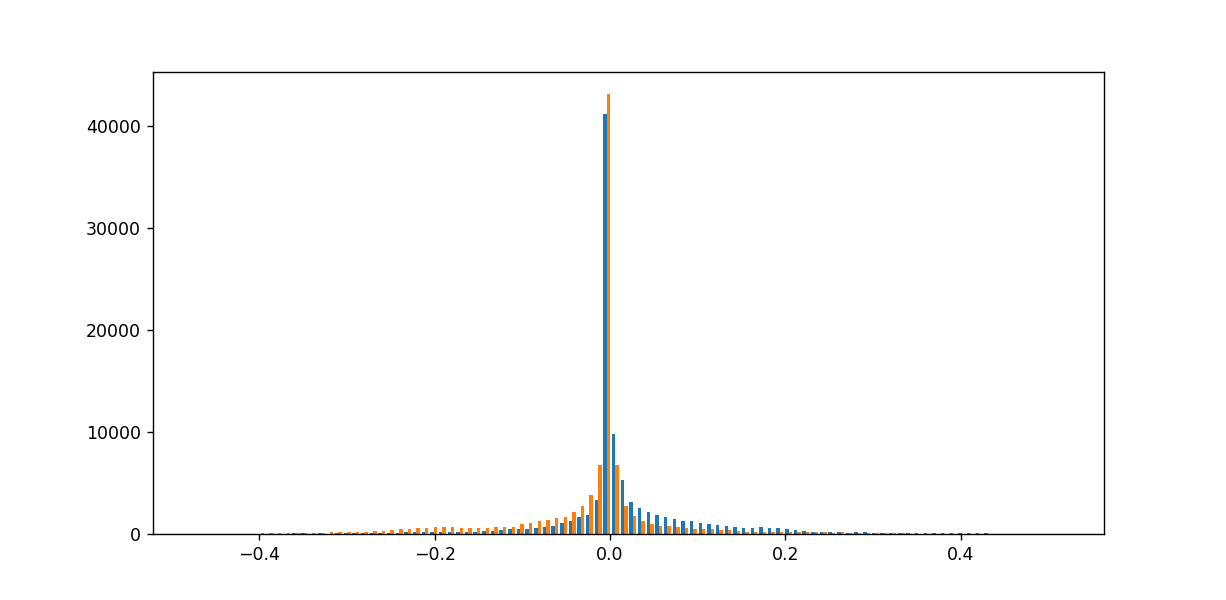

In [131]:
matplotlib.pyplot.hist(predictions[:100000] - 0.5 - channel1_float[:100000], bins=100);

<IPython.core.display.Javascript object>


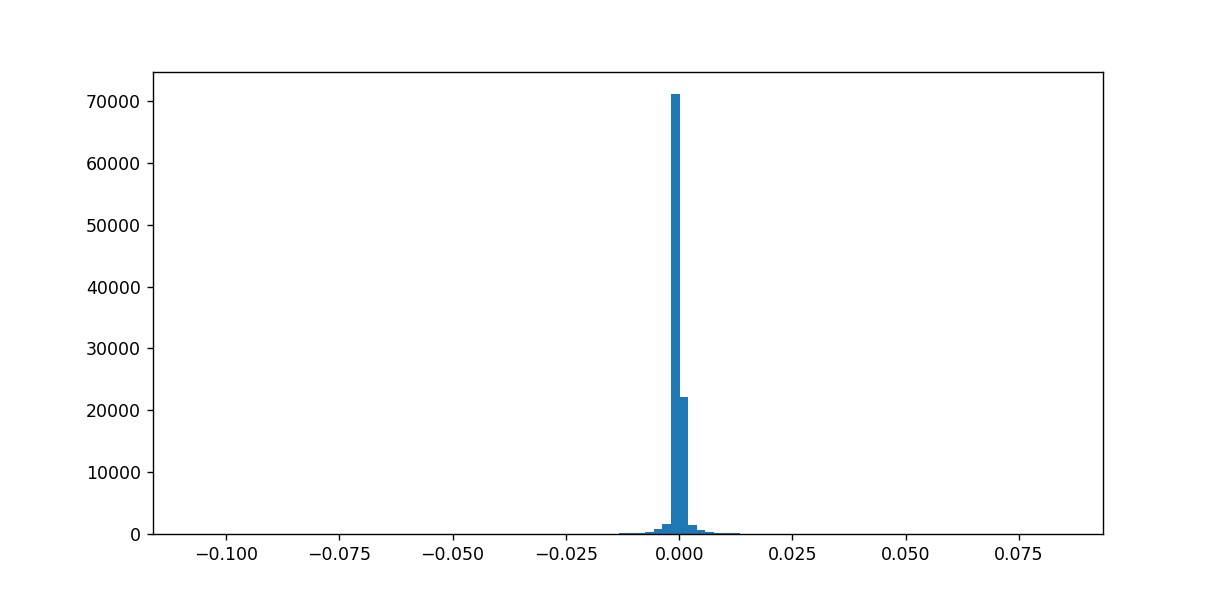

In [127]:
residues = get_linear_prediction_residues(channel1_float.T[0])
matplotlib.pyplot.hist(residues[:100000], bins=100);

<IPython.core.display.Javascript object>


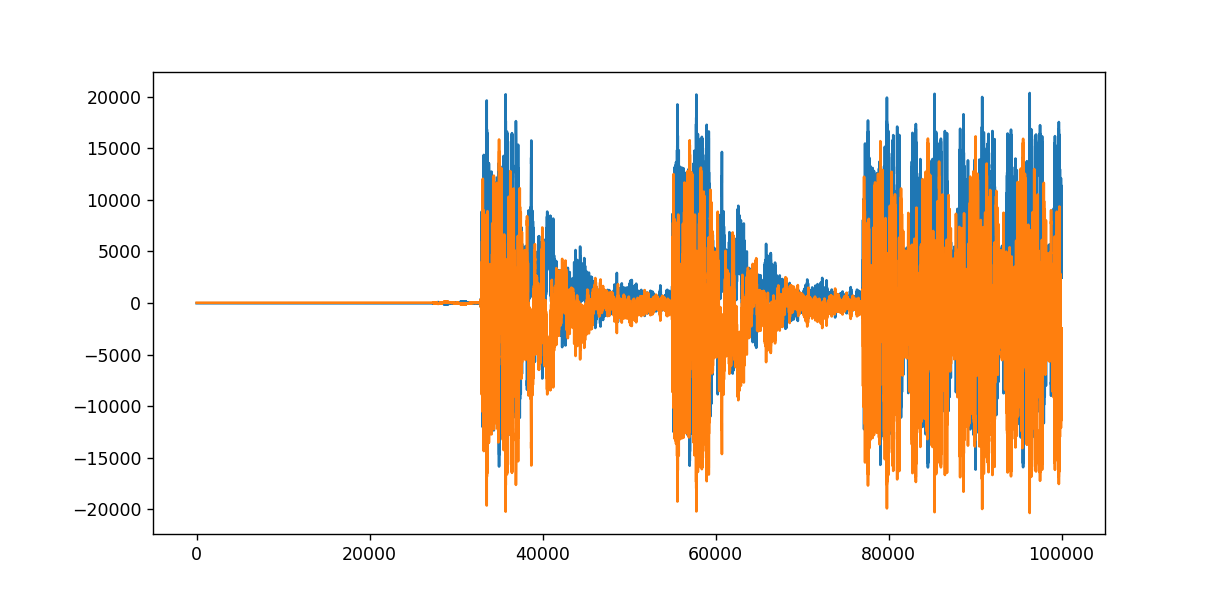

In [136]:
predicted_signal = (predictions - 0.5) * 2**16
plot(predicted_signal);

In [138]:
from scipy.io import wavfile
wavfile.write('predicted_mix.wav', 48000, predicted_signal)

In [15]:
dataset = build_dataset(channel1_float[:100000], 4096)

In [7]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

batch_size = 100000
input_size = 2048
output_size = 2
layer1_size = 2000
layer2_size = 1000
layer3_size = 500
layer4_size = 10
layer5_size = 2

num_steps = 3
learning_rate = 1e-4

graph = tf.Graph()

with graph.as_default():
  input = tf.placeholder(tf.float32, shape=(batch_size, input_size))
  output = tf.placeholder(tf.float32, shape=(batch_size, output_size))

  layer1_weights = tf.Variable(tf.random_normal((input_size, layer1_size), stddev=0.1))
  layer1_biases = tf.Variable(tf.constant(0.0, shape=(layer1_size,)))
  layer2_weights = tf.Variable(tf.random_normal((layer1_size, layer2_size), stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(0.0, shape=(layer2_size,)))
  layer3_weights = tf.Variable(tf.random_normal((layer2_size, layer3_size), stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(0.0, shape=(layer3_size,)))
  layer4_weights = tf.Variable(tf.random_normal((layer3_size, layer4_size), stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(0.0, shape=(layer4_size,)))
  layer5_weights = tf.Variable(tf.random_normal((layer4_size, output_size), stddev=0.1))
  layer5_biases = tf.Variable(tf.constant(0.0, shape=(output_size,)))

  # Model.
  def model(data):
    layer = tf.matmul(data, layer1_weights) + layer1_biases
    hidden = tf.nn.leaky_relu(layer)

    layer = tf.matmul(hidden, layer2_weights) + layer2_biases
    hidden = tf.nn.leaky_relu(layer)
    
    layer = tf.matmul(hidden, layer3_weights) + layer3_biases
    hidden = tf.nn.leaky_relu(layer)
    
    layer = tf.matmul(hidden, layer4_weights) + layer4_biases
    hidden = tf.nn.leaky_relu(layer)

    return tf.matmul(hidden, layer5_weights) + layer5_biases

  # Training computation.
  logits = model(input)
  #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=output, logits=logits))
  loss = tf.losses.mean_squared_error(output, logits)
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  prediction = tf.nn.softmax(logits)

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    feed_dict = {
        input: [x.left_input_frequency_domain for x in dataset],
        output: [[x.left_output, x.right_output] for x in dataset]
    }
    _, l, predictions1 = session.run([optimizer, loss, prediction], feed_dict=feed_dict)
    if (step % 10 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))

      #print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
  #print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 0.074870


In [ ]:
plot(channel1_float[:100000])